# Box Plot
---
Box plot adalah salah satu grafik yang merepresentasikan distribusi data secara statistik melalui lima dimensi utama, yaitu:
- Minimum : nilai terkecil dari data
- Kuartil-1 : nilai tengah antara nilai minimum dan median
- Median / Kuartil 2 : nilai tengah dari data
- Kuartil-3 : nilai tengah antara nilai median dan maksimum
- Maksimum : nilai tertinggi dari data

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
london_crime = pd.read_csv("london_crime_by_lsoa.csv")

### Dengan menggunakan Box Plot, kita dapat memperoleh informasi sebagai berikut:

---
#### Question: Bagaimana distribusi statistik dari data jumlah kasus kejahatan/kriminal di London tahun 2008-2016?

In [9]:
total_crime = london_crime.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
total_crime = total_crime.groupby("year").sum()
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Berikut adalah tabel jumlah kasus kejahatan/kriminal di London dari tahun 2008-2016.

In [10]:
total_crime.describe()

,value
count,9.000000
mean,716417.555556
std,21301.370555
min,680183.000000
25%,711624.000000
50%,717214.000000
75%,736121.000000
max,738641.000000


Berikut adalah nilai statistik dari data jumlah kasus kejahatan/kriminal di London tahun 2008-2016.

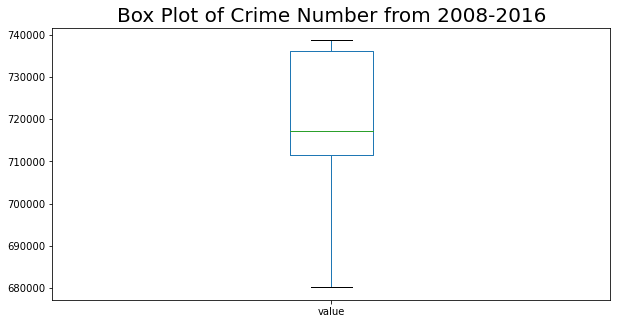

In [6]:
total_crime.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from 2008-2016", fontsize=20)
plt.show()

Berdasarkan plot di atas, diketahui bahwa nilai distribusi data jumlah kasus kejahatan/kriminal di London tidak terdapat _outlier_ atau nilai yang lebih jauh lebih besar/kecil dari data yang lain. Jumlah kasus kejahatan/kriminal di London tertinggi adalah sekitar 740000, terendah sebesar 680000, dan nilai tengah di sekitar 715000.

---
#### Question: Bagaimana distribusi statistik dari data jumlah kasus kejahatan/kriminal di masing-masing wilayah metropolitan tahun 2008-2016?

In [7]:
crime_frequency = london_crime.drop(["lsoa_code","major_category","minor_category","month","year"], axis=1)
crime_frequency = crime_frequency.groupby("borough").sum()
crime_frequency

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


Berikut adalah tabel jumlah kasus kejahatan/kriminal di masing-masing wilayah metropolitan di London tahun 2008-2016.

In [8]:
crime_frequency.describe()

,value
count,33.000000
mean,195386.606061
std,79148.057551
min,780.000000
25%,149447.000000
50%,203879.000000
75%,228613.000000
max,455028.000000


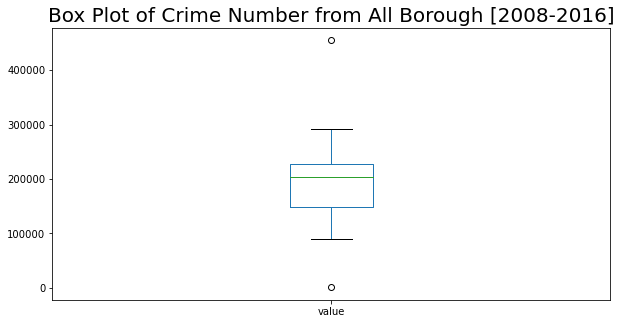

In [11]:
crime_frequency.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from All Borough [2008-2016]", fontsize=20)
plt.show()

Diketahui berdasarkan box plot di atas bahwa distribusi nilai statistik dari data jumlah kriminal/kejahatan di London terdapat dua titik _outlier_ yang berarti terdapat dua wilayah yang jauh lebih besar/kecil dari data yang lain. Berdasarkan kesimpulan dari visualisasi lainnya, diketahui Westminster adalah wilayah yang jumlah kasus kejahatan/kriminalnya jauh lebih tinggi dan City of London adalah wilayah yang jumlah kasus kejahatan/kriminalnya jauh lebih rendah. Jumlah kasus kejahatan di semua wilayah di London memiliki nilai minimum di sekitar 100000 dan maksimum di sekitar 300000.

---
#### Question: Bagaimana distribusi statistik dari data jumlah kasus kejahatan/kriminal berdasarkan kategorinya pada tahun 2008-2016?

In [12]:
totalCrimeEachType = london_crime.drop(["lsoa_code","borough","minor_category","year","month"], axis=1).groupby("major_category").sum()
totalCrimeEachType["value"].to_numpy()
totalCrimeEachType

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


Berikut adalah tabel jumlah kasus kejahatan/kriminal berdasarkan kategori mayornya tahun 2008-2016.

In [13]:
totalCrimeEachType.describe()

,value
count,9.000000e+00
mean,7.164176e+05
std,8.775569e+05
min,1.273000e+03
25%,1.063490e+05
50%,4.707650e+05
75%,7.542930e+05
max,2.661861e+06


Berikut adalah nilai statistik dari jumlah kasus kejahatan/kriminal berdasarkan kategori mayornya.

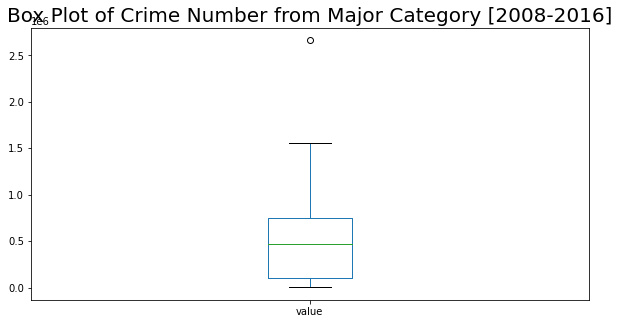

In [16]:
totalCrimeEachType.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from Major Category [2008-2016]", fontsize=20)
plt.show()

Berdasarkan box plot di atas, diketahui bahwa jumlah kasus kriminal/kejahatan berdasarkan kategori mayor memiliki satu nilai _outlier_ yang berarti terdapat kategori kejahatan/kriminal di mana jumlahnya jauh lebih besar dan dominan daripada kategori yang lain. Berdasarkan visualisasi sebelumnya, diketahui bahwa kategori Theft and Handling adalah kategori dengan jumlah kasus tertinggi. Data tersebar dengan nilai minimum sekitar 1000 dan maksimum di sekitar 1700000.

---
#### Question: Bagaimana distribusi statistik dari data jumlah kasus kejahatan/kriminal di London setiap 4 tahun sekali?

Diketahui bahwa jumlah kasus kejahatan/kriminal di London selalu mengalami kenaikan setiap 4 tahun sekali. Menggunakan box plot, kita dapat melihat bagaimana distribusi data jumlah kasus kejahatan/kriminal setiap 4 tahun itu selama 2008-2016.

In [17]:
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [20]:
year08_12 = total_crime.loc[2008:2012]
year12_16 = total_crime.loc[2012:2016]

In [26]:
year08_12

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329


In [30]:
year12_16

,value
year,
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [31]:
print(year08_12.describe())
print(year12_16.describe())

               value
count       5.000000
mean   726684.600000
std     10933.271848
min    715324.000000
25%    717214.000000
50%    724915.000000
75%    737329.000000
max    738641.000000
              value
count       5.00000
mean   710332.80000
std     26818.59251
min    680183.00000
25%    686407.00000
50%    711624.00000
75%    736121.00000
max    737329.00000


Text(0.5, 1.0, 'Box Plot of Crime Number from 2012-2016')

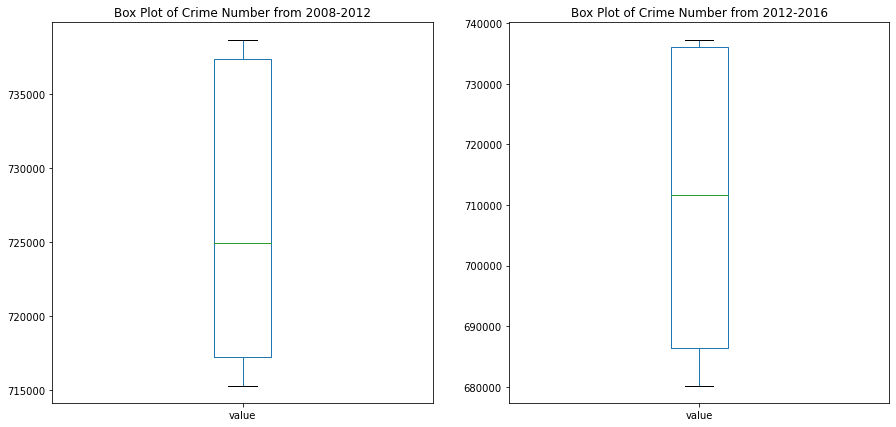

In [29]:
fig = plt.figure(figsize=(15,7))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

year08_12.plot(kind="box", ax=ax0)
ax0.set_title("Box Plot of Crime Number from 2008-2012")

year12_16.plot(kind="box", ax=ax1)
ax1.set_title("Box Plot of Crime Number from 2012-2016")

Berdasarkan kedua box plot di atas, diketahui bahwa jumlah kasus kejahatan/kriminal di tahun 2008-2012 dan 2012-2016 tidak jauh berbeda distribusi statistiknya. Tetapi, jumlah kasus di tahun 2008-2012 lebih tinggi dibanding jumlah kasus di tahun 2012-2016.

### Selain dari informasi yang sudah dilampirkan sebelumnya, dengan menggunakan Box Plot juga dapat memperoleh informasi tentang distribusi nilai statistik tertentu yang lebih spesifik lagi, seperti:
1. Distribusi nilai statistik jumlah kejahatan/kriminal di wilayah tertentu (misal distribusi nilai statistik jumlah kejahatan/kriminal di Westminster dan Southwark),
2. Distribusi nilai statistik jumlah kejahatan/kriminal di wilayah tertentu pada waktu/rentang waktu tertentu (misal distribusi nilai statistik jumlah kejahatn/kriminal di Enfield tahun 2008-2010),
3. Distribusi nilai statistik jumlah kejahatan/kriminal pada tahun tertentu (misal distribusi nilai statistik jumlah kejahatan/kriminal pada tahun 2016),
4. Distribusi nilai statistik jumlah kejahatan/kriminal di wilayah tertentu pada tahun tertentu (misal distribusi nilai statistik jumlah kejahatan/kriminal di Hillingdon tahun 2014), 
5. Distribusi nilai statistik jumlah kejahatan/kriminal di wilayah tertentu berdasarkan kategorinya di waktu/rentang waktu tertentu (misal distribusi nilai statistik jumlah kejahatan/kriminal Theft and Handling di Westminster tahun 2012-2016), dst.

# Conclusions

Dengan menggunakan Box Plot kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:
1. Jumlah kasus tertinggi kejahatan/kriminal di London dari tahun 2008-2016 adalah 740000 dan jumlah kasus terendah sebesar 680000.
2. Terdapat kategori kejahatan/kriminal yang terjadi dengan jumlah kasus jauh lebih tinggi dari kategori lainnya. Serta wilayah yang memiliki jumlah kasus yang jauh lebih tinggi dan jauh lebih rendah dari wilayah lainnya.
3. Jumlah kasus kejahatan/kriminal di tahun 2008-2012 lebih tinggi dibanding jumlah kasus kejahatan/kriminal di tahun 2012-2016 walaupun tidak jauh berbeda.